#MTH 5000 – Applied Forecasting of Financial Data
##Lecture 2: Foundations of Time Series Data and Visualization

---
Topics

*   1. Loading and prepping our Data
*   2. Time Plots
*   3. Resampling
*   4. Fitting plots to our sample data


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import io
from google.colab import files

#1. Loading and prepping our Data

In [110]:
uploaded = files.upload()

Saving stock_data.csv to stock_data (3).csv


Here we will load the dataset and use the parse_dates parameter to convert the Date column to the DatetimeIndex format.

In [111]:
# Read the uploaded CSV into pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]),parse_dates=True,index_col="Date")

In [112]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


We will drop columns from the dataset that are not important for our visualization.




In [113]:
df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


We will create a new colun named high_low_diff to better view the changes in price per day

In [114]:
df['high_low_diff'] = df['High'] - df['Low']
df.head()

,Open,High,Low,Close,Volume,Name,high_low_diff
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,2.43
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,1.13
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,0.88
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,0.77
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,0.84


In [115]:
#Finding max change between high and low stock price
df['high_low_diff'].max()
df.loc[df['high_low_diff'].idxmax()]

,2015-05-19
Open,44.38
High,44.66
Low,39.12
Close,40.98
Volume,45363929
Name,AABA
high_low_diff,5.54


In [116]:
#Finding min change between high and low stock price
df['high_low_diff'].min()
df.loc[df['high_low_diff'].idxmin()]

,2012-03-09
Open,14.63
High,14.7
Low,14.61
Close,14.63
Volume,9772432
Name,AABA
high_low_diff,0.09


# 2. Time Series Plots

For time series data the most obvious graph to start with is a **time plot**

Time plots are a type of line plot which is used for continuous data where a value is plotted against a metric of time to highlight trends and fluctuations.


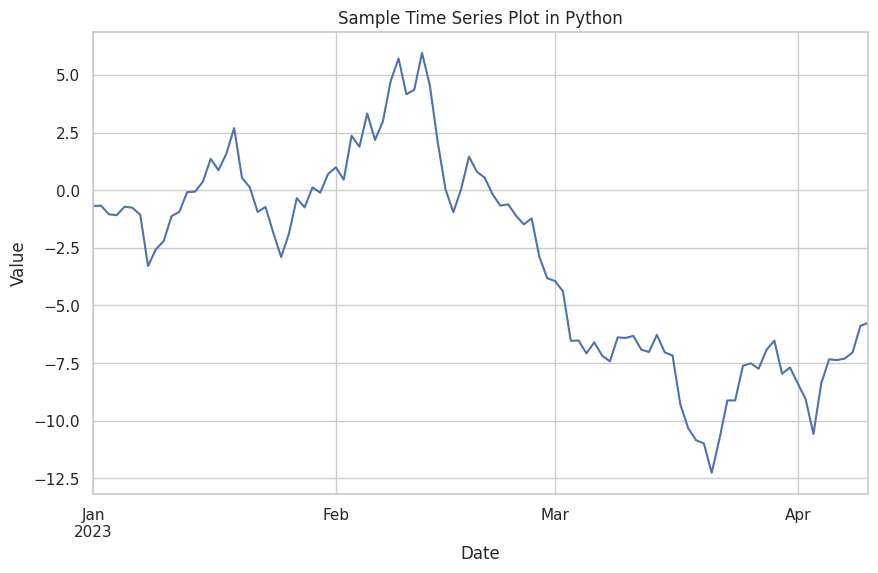

In [117]:
#Packages used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Generate sample data
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100).cumsum()
sample_df = pd.DataFrame({'Value': values}, index=dates)

#Plot the time series
plt.figure(figsize=(10, 6)) #adjust figure size
sample_df['Value'].plot() # Use the pandas plot method

#Add labels and title
plt.title('Sample Time Series Plot in Python')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True) # Add grid lines for readability

#Display the plot
plt.show()


The next type of plots for time series data is a **bar chart**

Bar charts are used for discrete data to show frequency across categories

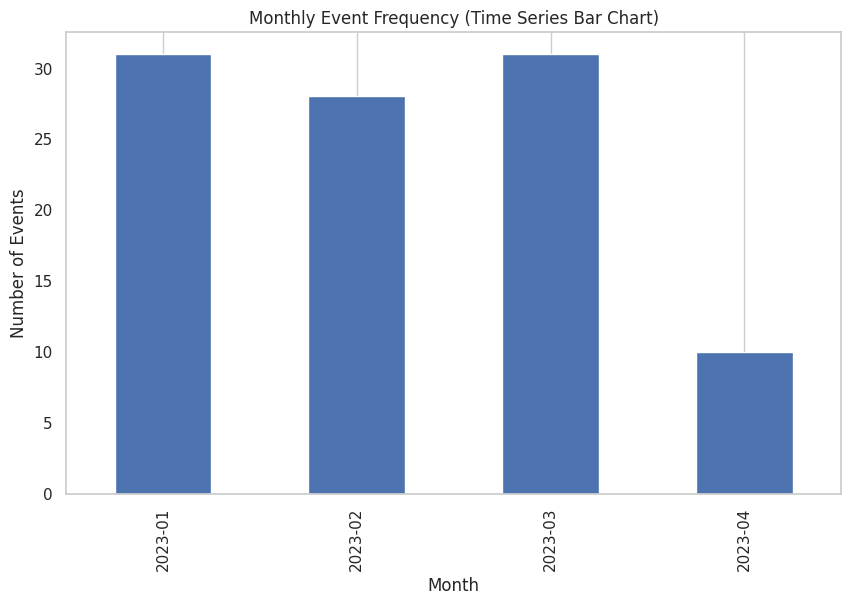

In [118]:
# Generate sample time series event data
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
events = np.random.choice(['Buy', 'Sell', 'Hold'], size=100)

sample_df_1 = pd.DataFrame({'Event': events}, index=dates)

# Group by month and extract year-month from the index
sample_df_1['YearMonth'] = sample_df_1.index.to_period('M')

# Count number of events per month
event_counts = sample_df_1.groupby('YearMonth').count()

# Plot the bar chart
plt.figure(figsize=(10, 6))
event_counts['Event'].plot(kind='bar')

# Add labels and title
plt.title('Monthly Event Frequency (Time Series Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.grid(axis='y')

# Display the plot
plt.show()


The next type of plots for time series data is a **Histogram**

Histograms are used for discrete data to show distribution across categories

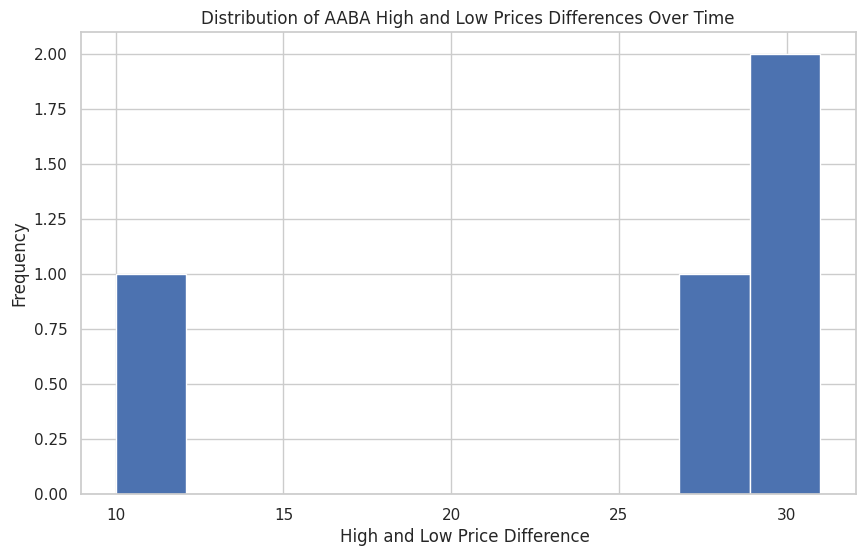

In [144]:
#Histogram of Time Series Values

plt.figure(figsize=(10, 6)) #adjust figure size
plt.hist(event_counts['Event'])

#Add labels and title
plt.title('Distribution of AABA High and Low Prices Differences Over Time')
plt.xlabel('High and Low Price Difference ')
plt.ylabel('Frequency')
plt.grid(True)

#Display the plot
plt.show()

The last plot we will discuss is a lag plot which is a scatter plot that compares a time series to a shifted (lagged) version of itself, such as today’s value versus yesterday’s value. It helps reveal whether observations are dependent over time.

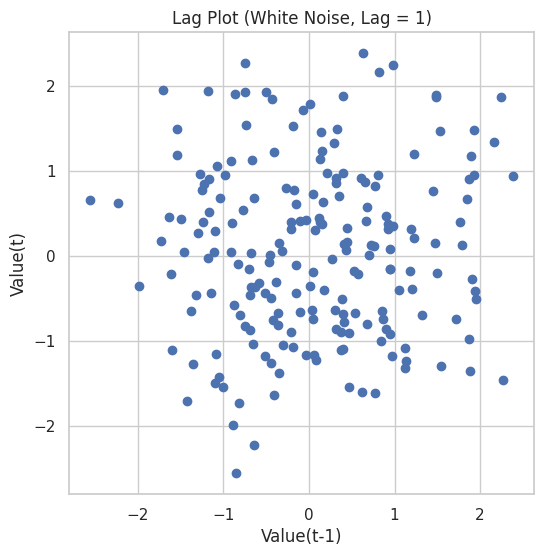

In [154]:
#Generate random time series (white noise)
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=200, freq='D')
values = np.random.randn(200)   # NO cumsum
rand_df = pd.DataFrame({'Value': values}, index=dates)

#Create lagged values (lag = 1)
lag = 1
y_t = rand_df['Value'][lag:]
y_lag = rand_df['Value'].shift(lag)[lag:]

#Plot lag plot
plt.figure(figsize=(6, 6))
plt.scatter(y_lag, y_t)

#Labels and title
plt.title('Lag Plot (White Noise, Lag = 1)')
plt.xlabel('Value(t-1)')
plt.ylabel('Value(t)')
plt.grid(True)

plt.show()



A visible pattern or diagonal band suggests structure, while a random cloud suggests little or no time dependence.

# 3. Resampling

To better understand the trend of the data we will use the resampling method which provide a clearer view of trends and patterns when we are dealing with daily data.

Resampling is the process of changing the frequency of your time-indexed data.

There are two main types of resampling in time series analysis the first being

## **Downsampling** means you are reducing the frequency of your data.

Example: Daily → Monthly

You have more data points than you need, so you aggregate them using some summary function like .sum(), .mean(), or .count().

In [119]:
import pandas as pd

dates = pd.date_range('2026-01-01', '2026-01-10')
sales = [5, 8, 6, 7, 10, 12, 5, 6, 7, 8]
df_sample_2 = pd.DataFrame({'Sales': sales}, index=dates)

# Downsample daily → monthly by summing
monthly_sales = df_sample_2.resample('M').sum()
print(monthly_sales)


            Sales
2026-01-31     74


/tmp/ipython-input-50091382.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_sample_2.resample('M').sum()


10 daily sales values are summed to give one value per month.

This is downsampling because we went from more frequent (daily) → less frequent (monthly).

## **Upsampling** is the opposite: you are increasing the frequency of your data.

Example: Monthly → Daily

There are missing values in the higher frequency (days) that weren’t in the original data.

You fill them using methods like:

ffill() → forward fill (use last known value)

bfill() → backward fill (use next known value)

Interpolation → smooth numeric values

In [120]:
monthly = pd.DataFrame({'Value': [100, 200]}, index=pd.to_datetime(['2026-01-31', '2026-02-28']))

# Upsample monthly → daily
daily = monthly.resample('D').ffill()
print(daily)  # first month

            Value
2026-01-31    100
2026-02-01    100
2026-02-02    100
2026-02-03    100
2026-02-04    100
2026-02-05    100
2026-02-06    100
2026-02-07    100
2026-02-08    100
2026-02-09    100
2026-02-10    100
2026-02-11    100
2026-02-12    100
2026-02-13    100
2026-02-14    100
2026-02-15    100
2026-02-16    100
2026-02-17    100
2026-02-18    100
2026-02-19    100
2026-02-20    100
2026-02-21    100
2026-02-22    100
2026-02-23    100
2026-02-24    100
2026-02-25    100
2026-02-26    100
2026-02-27    100
2026-02-28    200


Original: one value per month

After upsampling: every day has a value

Missing days are filled using the last known value (ffill)

## To resample you use **.resample(freq)** function from pandas, where freq is a time frequency string like:

| Frequency | Meaning                 |
| --------- | ----------------------- |
| 'D'       | Daily                   |
| 'W'       | Weekly (default Sunday) |
| 'M'       | Month end               |
| 'ME'      | Month end (same as 'M') |
| 'MS'      | Month start             |
| 'Q'       | Quarter end             |
| 'A'       | Year end                |
| 'H'       | Hourly                  |


**Note that you must have a DatetimeIndex for your DataFrame/Series.**

# 4. Fitting plots to our data

## Basic Time plot of High Price

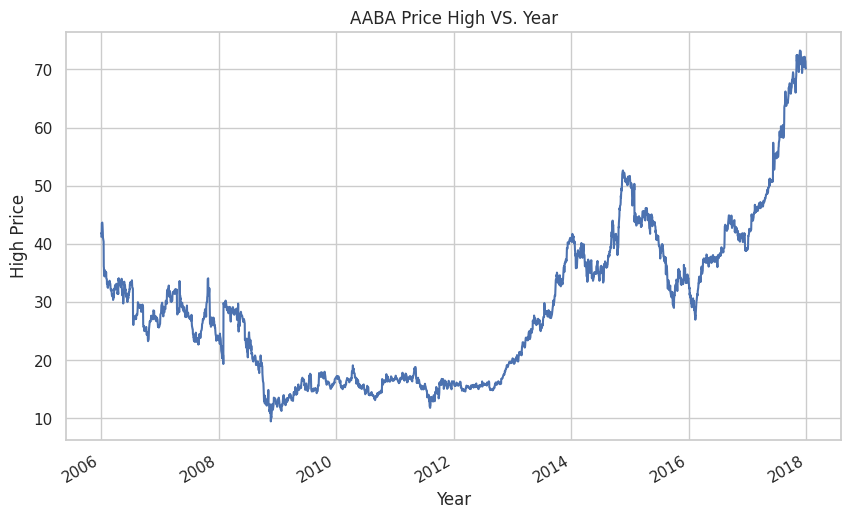

In [121]:
#Plot the time series
plt.figure(figsize=(10, 6)) #adjust figure size
df['High'].plot() #Swap High with paramater

#Add labels and title
plt.title('AABA Price High VS. Year')
plt.xlabel('Year')
plt.ylabel('High Price')
plt.grid(True) # Add grid lines for readability

#Display the plot
plt.show()

## Bar Plot of Yearly High

/tmp/ipython-input-2010749190.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_high = df['Low'].resample('Y').max() #df['High'].resample('M').max() to monthly


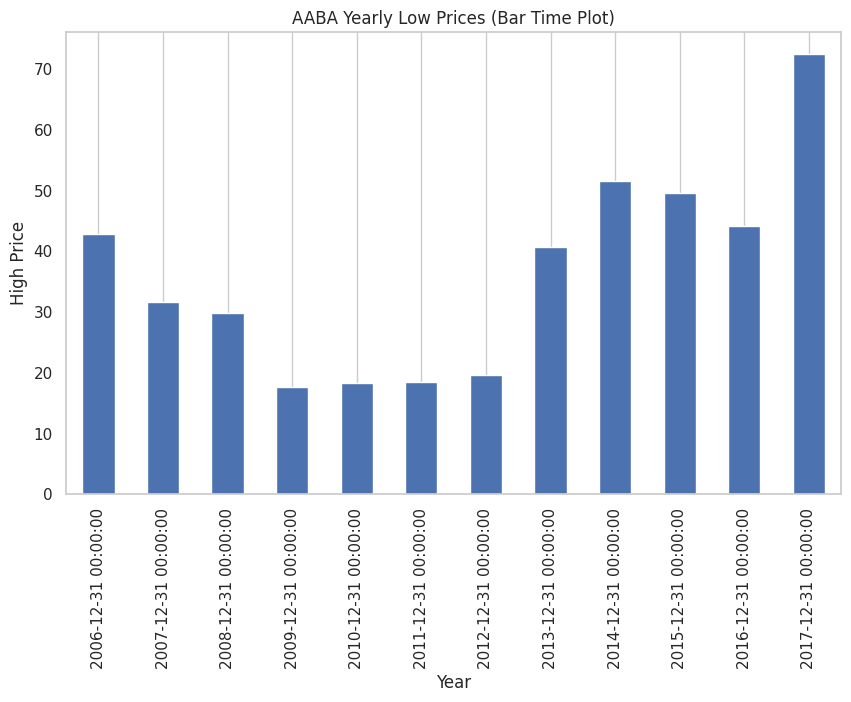

In [159]:
#Time Series Bar Plot (Yearly High)

plt.figure(figsize=(10, 6)) #adjust figure size

#Resample to yearly max (you can change to .mean() or .sum())
yearly_high = df['Low'].resample('Y').max() #df['High'].resample('M').max() to monthly

yearly_high.plot(kind='bar')

#Add labels and title
plt.title('AABA Yearly Low Prices (Bar Time Plot)')
plt.xlabel('Year')
plt.ylabel('High Price')
plt.grid(axis='y')

#Display the plot
plt.show()


We use max because this column already represents daily highs, and we want the highest price per year

## Histogram of high and low differences

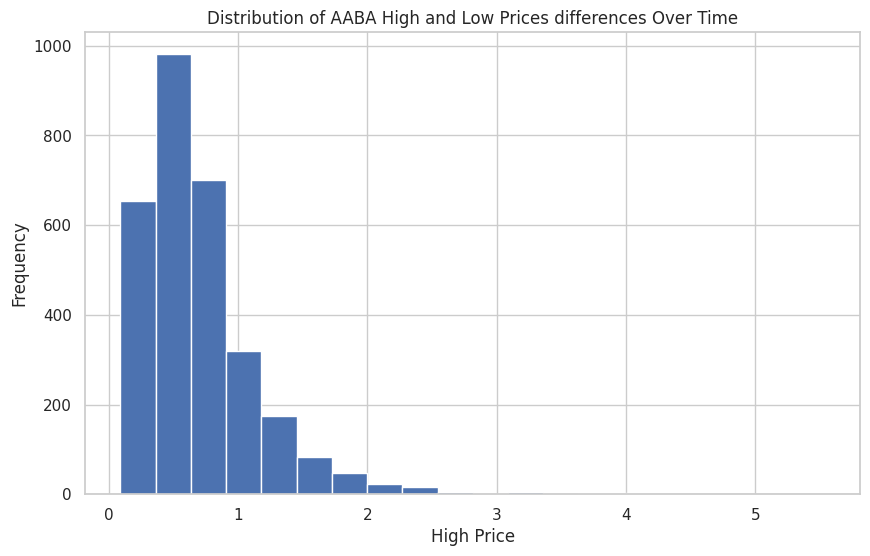

In [131]:
#Histogram of Time Series Values

plt.figure(figsize=(10, 6)) #adjust figure size
plt.hist(df['high_low_diff'], bins=20)

#Add labels and title
plt.title('Distribution of AABA High and Low Prices Differences Over Time')
plt.xlabel('High and Low Price Difference ')
plt.ylabel('Frequency')
plt.grid(True)

#Display the plot
plt.show()

The histogram ignores time order and only shows the distribution of values.

## Lag Plot of Close Prices

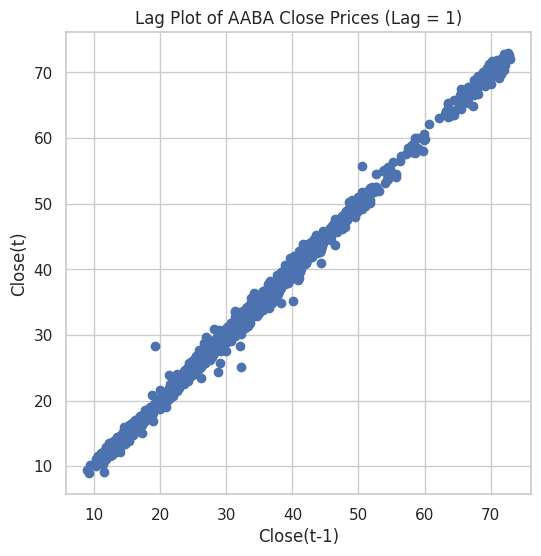

In [158]:
#Lag plot for stock Closing prices

lag = 1
y_t = df['Close'][lag:]
y_lag = df['Close'].shift(lag)[lag:]

plt.figure(figsize=(6, 6))
plt.scatter(y_lag, y_t)

#Labels and title
plt.title('Lag Plot of AABA Close Prices (Lag = 1)')
plt.xlabel('Close(t-1)')
plt.ylabel('Close(t)')
plt.grid(True)

plt.show()

Since the points form a pattern (like a diagonal band or curve), it suggests autocorrelation, meaning current values depend on past values.

## Upsample of High Prices

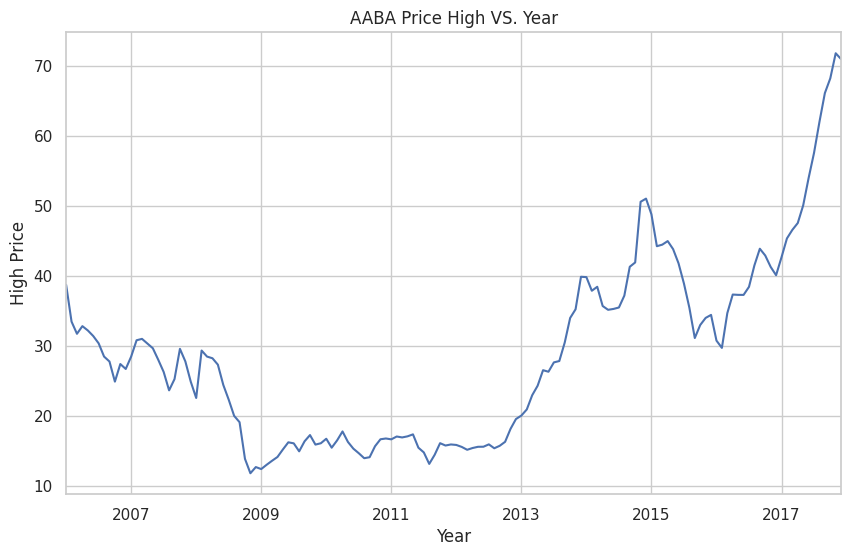

In [161]:
#Upsample from year -> month
df_resampled = df.resample('ME').mean(numeric_only=True)

#Plot the time series
plt.figure(figsize=(10, 6))
df_resampled['High'].plot()

#Add labels and title
plt.title('AABA Price High VS. Year')
plt.xlabel('Year')
plt.ylabel('High Price')
plt.grid(True) # Add grid lines for readability

#Display the plot
plt.show()



## Downsample of High Prices

/tmp/ipython-input-3599120757.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resampled = df.resample('A').mean(numeric_only=True)


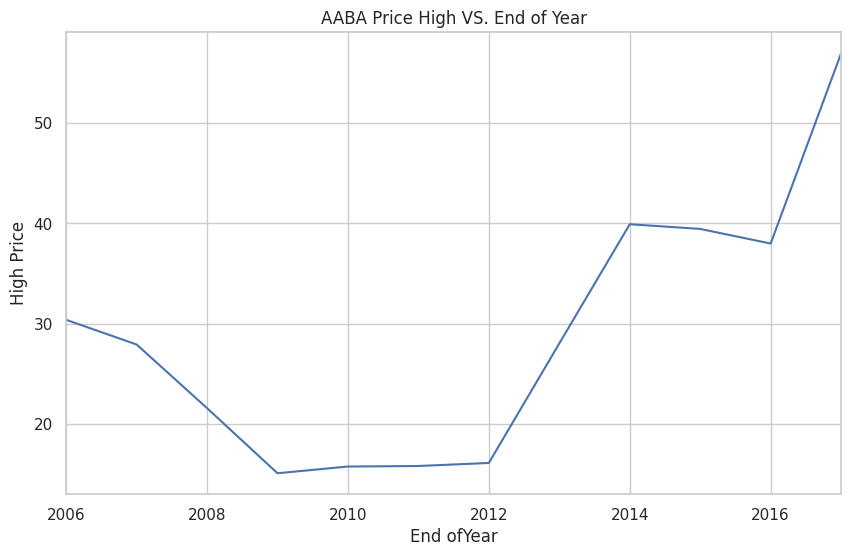

In [124]:
#Downsample from year -> year end
df_resampled = df.resample('A').mean(numeric_only=True)

#Plot the time series
plt.figure(figsize=(10, 6))
df_resampled['High'].plot()

#Add labels and title
plt.title('AABA Price High VS. End of Year')
plt.xlabel('End ofYear')
plt.ylabel('High Price')
plt.grid(True) # Add grid lines for readability

#Display the plot
plt.show()



## To Summarize our Plots and Resampling Methods

| Plot              | X-axis | What it shows                  |
| ----------------- | ------ | ------------------------------ |
| Time plot         | Time   | How values change              |
| **Bar time plot** | Time   | Discrete totals/max per period |
| **Histogram**     | Value  | Distribution across time       |
| **Lag plot**     | Value   | Visual test for autocorrelation|\



|Method     | Use Cases                 |
|-----------|---------------------------|
|Downsample |compress data and summarize|
|Upsample   |Expand data and fill gaps  |